In [3]:
# Creating folder
import os
import shutil

def create_folder(folder):
    print(folder)
    try:
        shutil.rmtree(folder)
        print(f"Folder '{folder}' and its contents removed successfully.")
    except FileNotFoundError:
        print(f"Folder '{folder}' not found.")
    except OSError as e:
        print(f"An error occurred: {e}")
    try:
        os.mkdir(folder)
        print(f"Folder '{folder}' created successfully.")
    except FileExistsError:
        print(f"Folder '{folder}' already exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

folder_name = "Sample_SFLARE1" #input("Enter the name of the folder you want to create: ")
name = 'bn121222062'
year = '2012/'

current_path = os.getcwd()

folder_path = os.path.join(current_path, folder_name)

create_folder(folder_path)
    
# Fetching data
import subprocess

# URL of the file you want to download
url1 = "wget -q -nH --no-check-certificate --cut-dirs=7 -r -l0 -c -N -np -A fit -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/"+year+name+'//current/'
url2 = "wget -q -nH --no-check-certificate --cut-dirs=7 -r -l0 -c -N -np -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/"+year+name+'//quicklook/'

# Directory where you want to save the downloaded file
download_folder = folder_path

# Construct the wget command
wget_command1 = f"{url1} -P {download_folder}"
wget_command2 = f"{url2} -P {download_folder}"


try:
    # Run the wget command
    subprocess.run(wget_command2, shell=True, check=True)
    print(f"Downloaded {url2} to {download_folder}")
except subprocess.CalledProcessError as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")
    
try:
    # Run the wget command
    subprocess.run(wget_command1, shell=True, check=True)
    print(f"Downloaded {url1} to {download_folder}")
except subprocess.CalledProcessError as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

c:\Users\arpan\OneDrive\Documents\GRB\SemProject\Sample_SFLARE1
An error occurred: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\arpan\\OneDrive\\Documents\\GRB\\SemProject\\Sample_SFLARE1\\current\\glg_tte_na_bn121222062_v00.fit'
Folder 'c:\Users\arpan\OneDrive\Documents\GRB\SemProject\Sample_SFLARE1' already exists.
Downloaded wget -q -nH --no-check-certificate --cut-dirs=7 -r -l0 -c -N -np -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2012/bn121222062//quicklook/ to c:\Users\arpan\OneDrive\Documents\GRB\SemProject\Sample_SFLARE1
Downloaded wget -q -nH --no-check-certificate --cut-dirs=7 -r -l0 -c -N -np -A fit -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2012/bn121222062//current/ to c:\Users\arpan\OneDrive\Documents\GRB\SemProject\Sample_SFLARE1


15.9667 -82.8667
from trigdat file glg_trigdat_all_bn140804347_v01.fit
n0 71 ; n1 64 ; n2 50 ; n3 120 ; n4 162 ; n5 104 ; n6 90 ; n7 101 ; n8 128 ; n9 42 ; na 19 ; nb 76 ; b0 108 ; b1 72 ; LAT-LLE 80 ; LAT 80 ;  
The brightest NaI detector is na - Source angle is: 19 deg
The brightest 3 NaI detectors are na ( 19 deg) n9 ( 42 deg) n2 ( 50 deg)
The brightest BGO detector is b1 ( 72 deg )


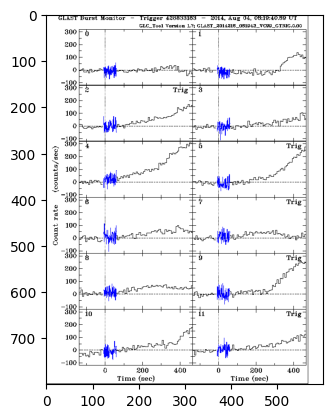

In [10]:
# ploting light curve
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from fast_histogram import histogram1d
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from astropy.io import ascii
import matplotlib.patches as mpatches
from matplotlib import rc,rcParams
from astropy.table import Table
%matplotlib inline
# %matplotlib notebook
from astropy.io import fits
from numpy import arange

folder_name = "Sample_TGF1"
current_path = os.getcwd()
folder_path = os.path.join(current_path, folder_name)

# finding all TTE files
directory_path = folder_path+"\\current"
target_string = "_tte_n"
trig_string = "_trigdat_"

# Finding NaI detectors
trig_pattern = os.path.join(directory_path, f"*{trig_string}*")
trigdat_file = glob.glob(trig_pattern)

# Get the spacecraft pointing        from here 
event_filename = trigdat_file[0]

# Getting the RA and DEC
pha_list = fits.open(event_filename, memmap=True)
ra_obj,dec_obj = (pha_list[0].header['RA_OBJ']) ,	(pha_list[0].header['DEC_OBJ'])
print(ra_obj,dec_obj)

# Use the glob module to search for TTE files in the directory
file_pattern = os.path.join(directory_path, f"*{target_string}*")
matching_files = glob.glob(file_pattern)

hdul = fits.open(matching_files[0])

from Calculating_det_angles import estimate_source_angles_detectors #importing ma'ams function

print('from trigdat file',event_filename.split('\\')[-1]) # just to verify that the correct file is checked to get the ra and dec

brightest_nai, bright_nais, brightest_bgo = estimate_source_angles_detectors.angle_to_grb(ra_obj,dec_obj,event_filename) # Getting the values

# till here

# displaying the quicklook
import matplotlib.image as mpimg

quicklook_dir = directory_path = folder_path+"\\quicklook"

# List all files in the directory
files = os.listdir(quicklook_dir)

# Filter the list to include only files with the string in their name
lc_all_files = [file for file in files if "_lc_all_" in file]

# Load the GIF
img = mpimg.imread(quicklook_dir+"\\"+lc_all_files[0])

# Display the GIF
plt.imshow(img)
plt.show()

NaI_detector = matching_files[0]
for string in matching_files:
    if '_'+brightest_nai+'_' in string:
        NaI_detector = string

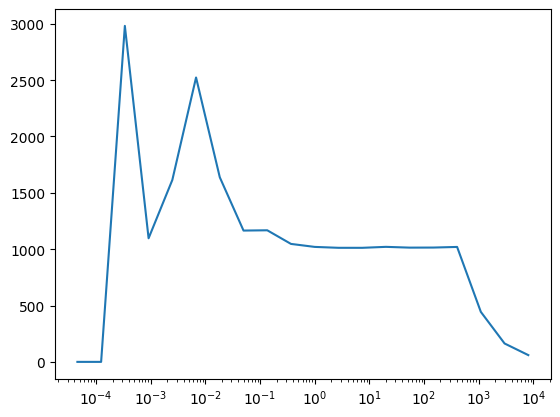

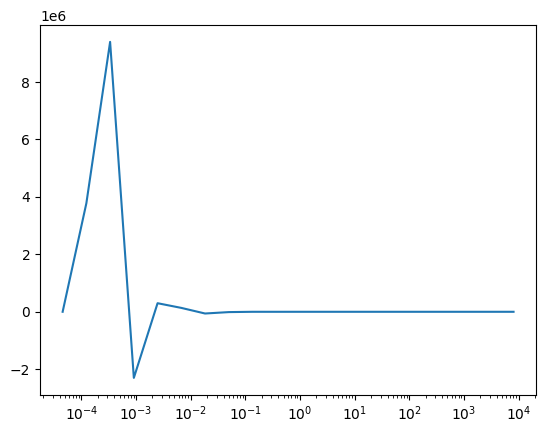

0.00033546262790251196


In [57]:
x=[]
y=[]
max_rate = 0
for i in range(-10,10):
    size = np.e ** i
    x.append(size)
    rate = histogram1d(counts, range=[0, size],bins=1)[0]/size
    y.append(rate)
    if rate > max_rate:
        max_rate = rate

# finding the index of max rate
max_index = y.index(max_rate)

# finding the corresponding x value
x_max = x[max_index]

plt.plot(x,y)
plt.xscale('log')
plt.show()

# Calculate the derivative using numpy.gradient
dy_dx = np.gradient(y, x)

plt.plot(x,dy_dx)
plt.xscale('log')
plt.show()
print(x_max)


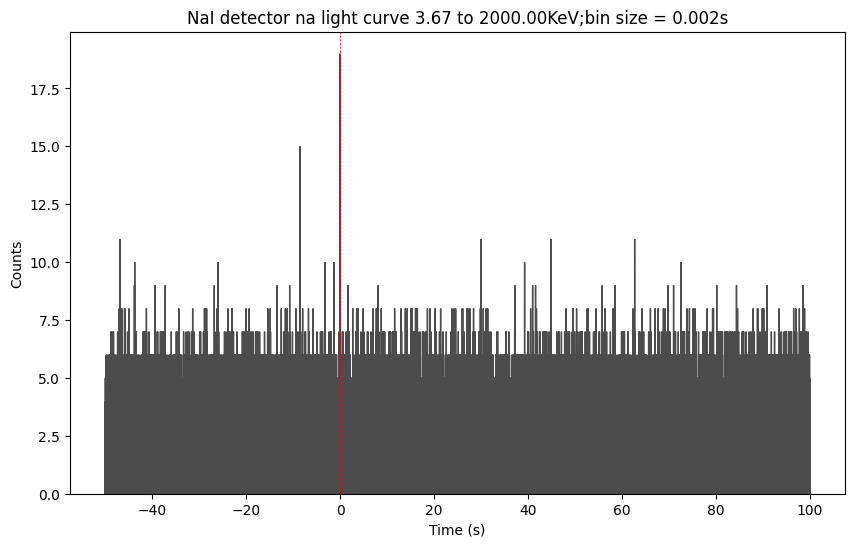

In [12]:
# Open the FITS file
hdul = fits.open(NaI_detector)

# Getting the trigger time
header_string = hdul[0].header.tostring()
position = header_string.find('TRIGTIME')
trigger_time=float(header_string[position+14:position+14+16])

# fetchinng data
energy_channel_data = hdul[1].data
all_count_data = np.array(hdul[2].data)

# getting counts accross all energy channels
counts = [float(sublist[0]) for sublist in all_count_data]

for i in np.arange(0,1,1):
    # Define the range and number of bins
    range_min = -50#min(counts)
    range_max =  100#max(counts)
    # bin_no = 
    bin_size = 0.002 #0.01*10**i  # (range_max - range_min)/bin_no  

    background = histogram1d(counts, range=[-22, -5],bins=300)

    # Create bin edges centered around 0
    bin_edges = np.arange(range_min, range_max, bin_size)

    # Setting energy channel range
    energy_channel_range = f"{energy_channel_data[0][1]:.2f} to {energy_channel_data[-1][-1]:.2f}KeV"

    # Plot the histogram
    plt.figure(figsize=(10,6))
    plt.hist(counts, bins=bin_edges,histtype='step', edgecolor='k', alpha=0.7, linewidth=1)
    plt.xlabel('Time (s)')
    plt.ylabel('Counts')
    # bin_size=str(" ;bin size:",float(bin_size))
    plt.title(f'NaI detector {brightest_nai} light curve ' + energy_channel_range+f";bin size = {bin_size}s")

    # Add a vertical line at x=0
    plt.axvline(x=0, color='red', linestyle='--',linewidth=0.5)

    # Show the plot
    plt.show()

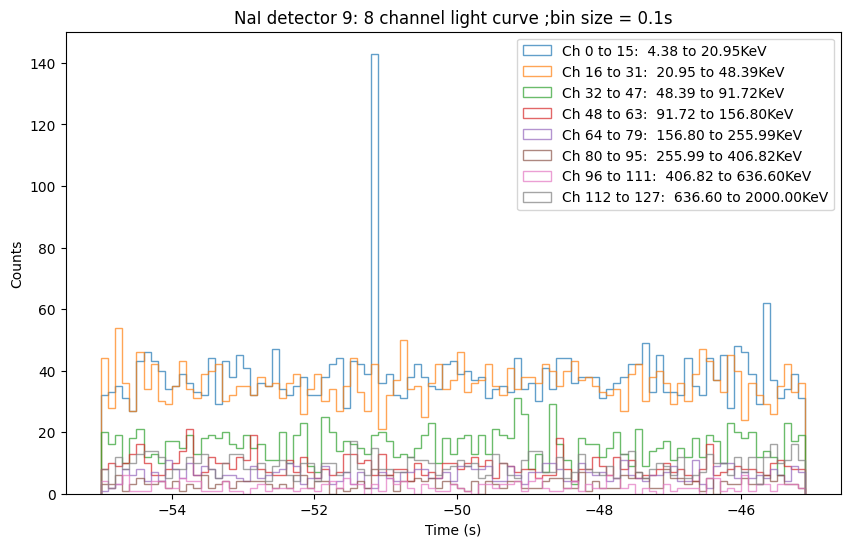

In [9]:
#Multichannel LightCurve

channel_number = 8 # set to number of desired channels

# fetchinng data
energy_channel_data = hdul[1].data
all_count_data = np.array(hdul[2].data)

channel_start = 0
channel_stop = int(128/channel_number)


# Define the range and number of bins
range_min = -55
range_max = -45
bin_size = 0.1  # Adjust the size of bins as needed

# Create bin edges centered around 0
bin_edges = np.arange(range_min, range_max, bin_size)

plt.figure(figsize=(10,6))
for i in range(channel_number):
    channels = list(np.arange(channel_start,channel_stop,1))
    counts = [float(count[0]) for count in all_count_data if int(count[1]) in channels]

    energy_range = f"{energy_channel_data[channels[0]][1]:.2f} to {energy_channel_data[channels[-1]][-1]:.2f}KeV"
    
    # Plot the histogram
    plt.hist(counts, bins=bin_edges,histtype='step', alpha=0.7, linewidth=1,label = f'Ch {channels[0]} to {channels[-1]}:  ' + energy_range)

    channel_start = channel_stop
    channel_stop = (i+2)*int(128/channel_number)
    

plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.title(f'NaI detector {NaI_detector}: {channel_number} channel light curve '+f";bin size = {bin_size}s")
plt.legend()

# Add a vertical line at x=0
# plt.axvline(x=0, color='red', linestyle='--',linewidth=0.5)

# Show the plot
plt.show()
